In [3]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request

api_key = "e4dac2ae52dd3ada5039b85cc5d88117"
client_secret = "DKU0iUtkA5"
encText = urllib.parse.quote("minion")
url = "https://dapi.kakao.com/v2/search/image?query={0}&size={1}".format(encText, 50) # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과

request = urllib.request.Request(url)
request.add_header("Authorization","KakaoAK {0}".format(api_key))
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))

else:
    print("Error Code:" + rescode)

{"documents":[{"collection":"blog","datetime":"2014-05-02T09:11:07.000+09:00","display_sitename":"티스토리","doc_url":"https://seogo.tistory.com/950","height":1080,"image_url":"https://t1.daumcdn.net/cfile/tistory/2350683B5362E1F62F","thumbnail_url":"https://search2.kakaocdn.net/argon/130x130_85_c/4EVRo7RWWHn","width":1920},{"collection":"blog","datetime":"2014-05-02T09:11:07.000+09:00","display_sitename":"티스토리","doc_url":"https://seogo.tistory.com/950","height":1200,"image_url":"https://t1.daumcdn.net/cfile/tistory/2641D53B5362E2522D","thumbnail_url":"https://search3.kakaocdn.net/argon/130x130_85_c/44EqEZIwN08","width":1920},{"collection":"blog","datetime":"2015-01-16T02:47:00.000+09:00","display_sitename":"네이버블로그","doc_url":"http://blog.naver.com/wsy0991/220241777160","height":464,"image_url":"https://postfiles.pstatic.net/20150116_89/wsy0991_1421343807920FBpQn_JPEG/KakaoTalk_20150116_011142263.jpg?type=w2","thumbnail_url":"https://search3.kakaocdn.net/argon/130x130_85_c/6wCMO7m2bLy","wi

In [4]:
import json


In [5]:
text_response = response_body.decode('utf-8')
dict_response = json.loads(text_response) #위에 보기 힘든걸 Json형식으로 바꿔줌
text_response
#dict_response

'{"documents":[{"collection":"blog","datetime":"2014-05-02T09:11:07.000+09:00","display_sitename":"티스토리","doc_url":"https://seogo.tistory.com/950","height":1080,"image_url":"https://t1.daumcdn.net/cfile/tistory/2350683B5362E1F62F","thumbnail_url":"https://search2.kakaocdn.net/argon/130x130_85_c/4EVRo7RWWHn","width":1920},{"collection":"blog","datetime":"2014-05-02T09:11:07.000+09:00","display_sitename":"티스토리","doc_url":"https://seogo.tistory.com/950","height":1200,"image_url":"https://t1.daumcdn.net/cfile/tistory/2641D53B5362E2522D","thumbnail_url":"https://search3.kakaocdn.net/argon/130x130_85_c/44EqEZIwN08","width":1920},{"collection":"blog","datetime":"2015-01-16T02:47:00.000+09:00","display_sitename":"네이버블로그","doc_url":"http://blog.naver.com/wsy0991/220241777160","height":464,"image_url":"https://postfiles.pstatic.net/20150116_89/wsy0991_1421343807920FBpQn_JPEG/KakaoTalk_20150116_011142263.jpg?type=w2","thumbnail_url":"https://search3.kakaocdn.net/argon/130x130_85_c/6wCMO7m2bLy","w

In [6]:
print(dict_response.keys())

dict_keys(['documents', 'meta'])


In [7]:
#dict_response['documents']
dict_response['documents'][0]

{'collection': 'blog',
 'datetime': '2014-05-02T09:11:07.000+09:00',
 'display_sitename': '티스토리',
 'doc_url': 'https://seogo.tistory.com/950',
 'height': 1080,
 'image_url': 'https://t1.daumcdn.net/cfile/tistory/2350683B5362E1F62F',
 'thumbnail_url': 'https://search2.kakaocdn.net/argon/130x130_85_c/4EVRo7RWWHn',
 'width': 1920}

In [8]:
import pandas as pd
df_documents = pd.DataFrame(dict_response['documents'])
#df_documents['image_url']
df_documents.head()

,collection,datetime,display_sitename,doc_url,height,image_url,thumbnail_url,width
0,blog,2014-05-02T09:11:07.000+09:00,티스토리,https://seogo.tistory.com/950,1080,https://t1.daumcdn.net/cfile/tistory/2350683B5...,https://search2.kakaocdn.net/argon/130x130_85_...,1920
1,blog,2014-05-02T09:11:07.000+09:00,티스토리,https://seogo.tistory.com/950,1200,https://t1.daumcdn.net/cfile/tistory/2641D53B5...,https://search3.kakaocdn.net/argon/130x130_85_...,1920
2,blog,2015-01-16T02:47:00.000+09:00,네이버블로그,http://blog.naver.com/wsy0991/220241777160,464,https://postfiles.pstatic.net/20150116_89/wsy0...,https://search3.kakaocdn.net/argon/130x130_85_...,743
3,blog,2014-01-03T19:08:00.000+09:00,네이버블로그,http://blog.naver.com/aloneworld2/50186232677,438,https://postfiles.pstatic.net/20140103_48/alon...,https://search2.kakaocdn.net/argon/130x130_85_...,700
4,blog,2015-01-17T14:54:00.000+09:00,네이버블로그,http://blog.naver.com/wsy0991/220243211093,1041,https://postfiles.pstatic.net/20150117_250/wsy...,https://search3.kakaocdn.net/argon/130x130_85_...,736


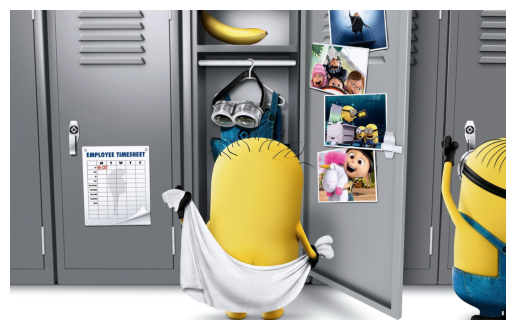

In [11]:
# !pip install matplotlib
import matplotlib.pyplot as plt
import requests # urllib.request와 비슷한 기능을 수행하는 다른 모듈
from PIL import Image #이미지 처리 모듈 + 클래스
from io import BytesIO #메모리의 데이터를 파일처럼 사용하는 도구

response = requests.get(df_documents['image_url'][1])
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    pass
else:
    print("errpr" + response.status_code)